In [1]:
from mb_rag.basic import ModelFactory
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')


In [2]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [3]:
from mb_rag.agents.seg_autolabel import create_bb_agent,SegmentationGraph

In [4]:
agent = create_bb_agent(llm.model,logging=False,langsmith_params=True)
graph_agent = SegmentationGraph(agent)

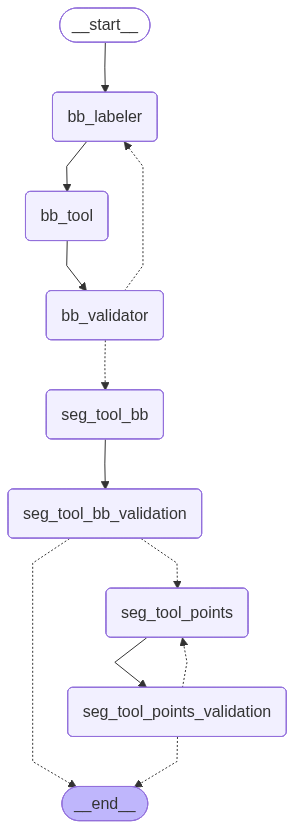

In [5]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

In [ ]:
graph_agent.run(image_path='./data/IMG_1827.jpg', query="Create a bounding box around scrambled eggs in the image.")

In [ ]:
from mb_rag.utils.extra import ImagePredictor

In [ ]:
a = ImagePredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

In [ ]:
a.set_image('./data/image.jpg')

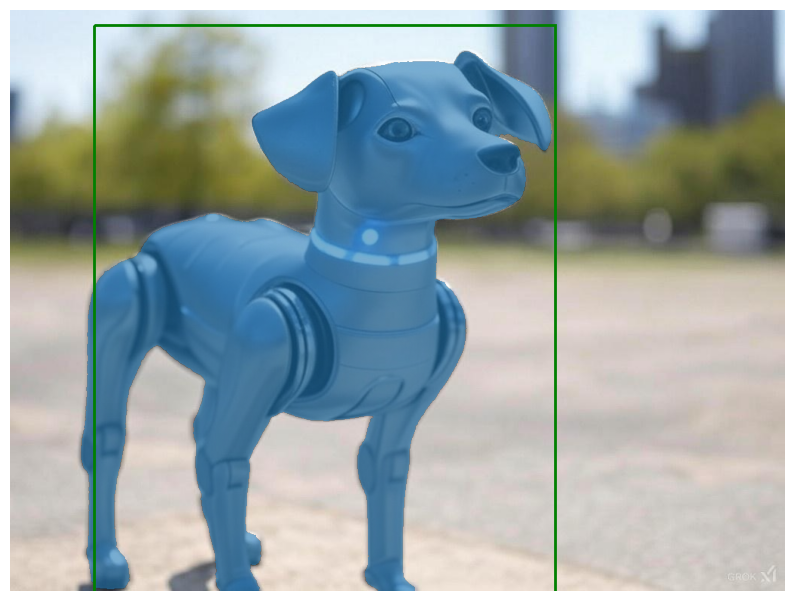

In [ ]:
mask,_,_ =a.predict_item(bbox=[20, 110, 800, 720]) 


(-0.5, 1023.5, 767.5, -0.5)

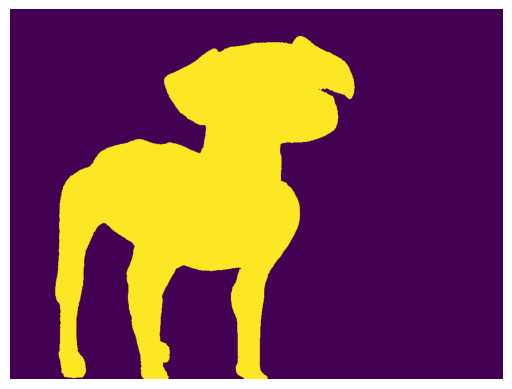

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mask_new = np.transpose(mask, (1, 2, 0))
plt.imshow(mask_new)
plt.axis('off')